In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from scipy.optimize import curve_fit

In [34]:
df = pd.read_csv('many.csv')
df = df.append(pd.read_csv('all.csv'))
df['efficiency'] = df['attack'] / df['exchange']
df_no_braid = df[df['group'] != 'Braid4']
df_no_braid = df_no_braid[df_no_braid['group'] != 'Braid5']


C:\Users\reedn\AppData\Local\Temp\ipykernel_211408\2254527000.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv('all.csv'))


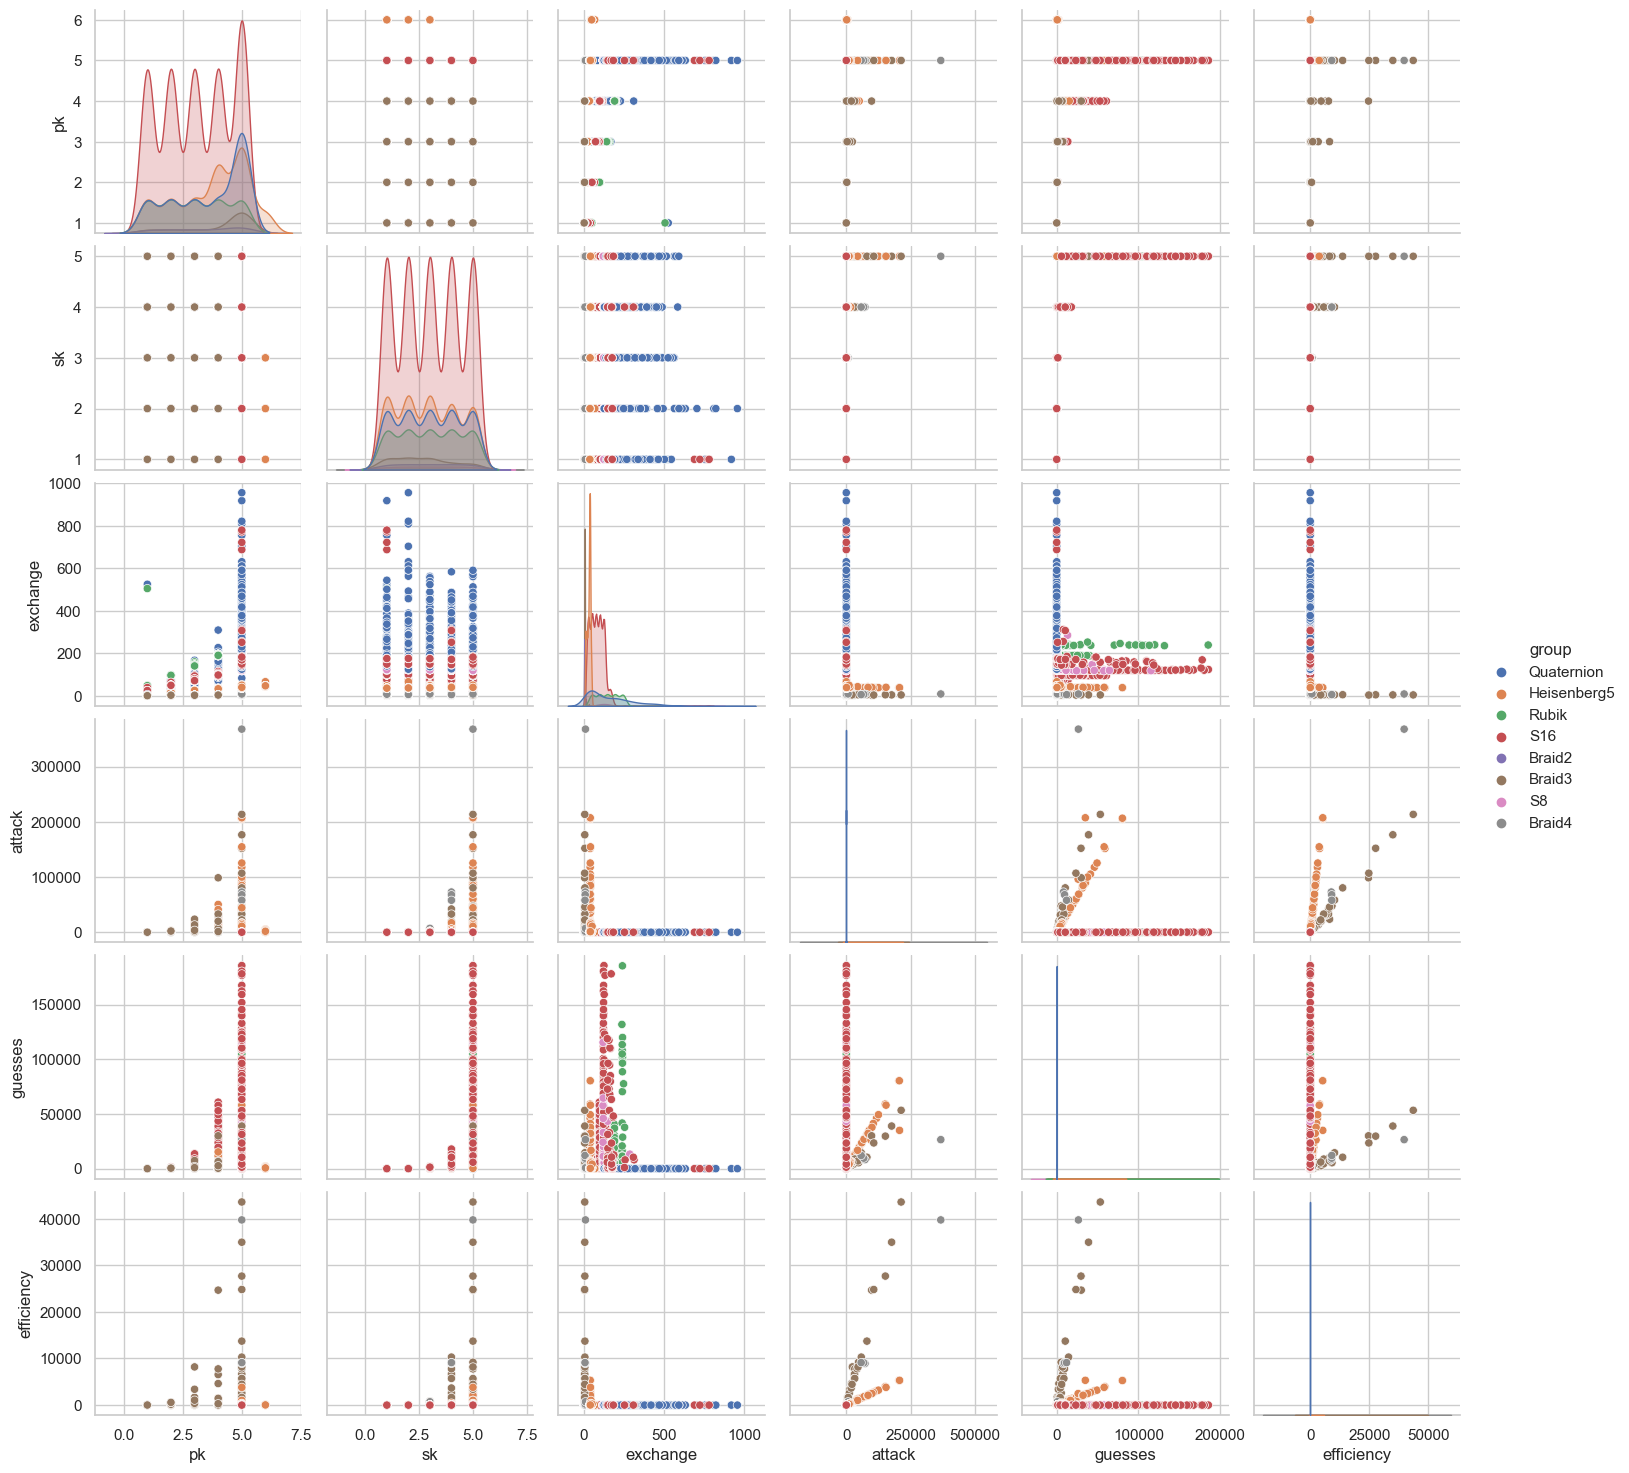

In [35]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df[df['sk'] <= 5], hue='group')
plt.show()

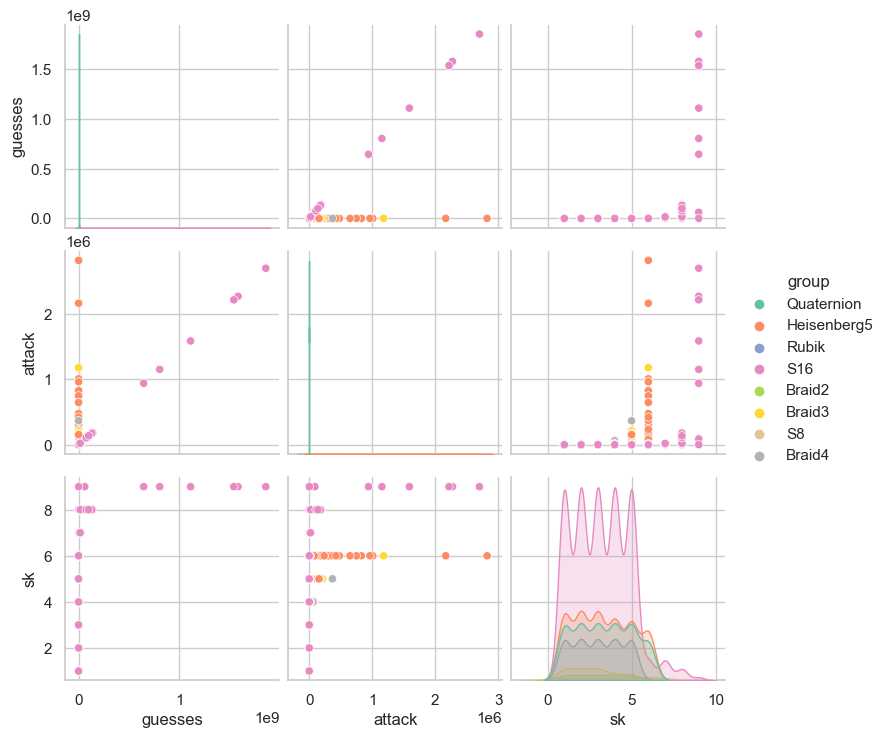

In [36]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df, hue='group', vars=['guesses', 'attack', 'sk'], palette='Set2')
plt.show()

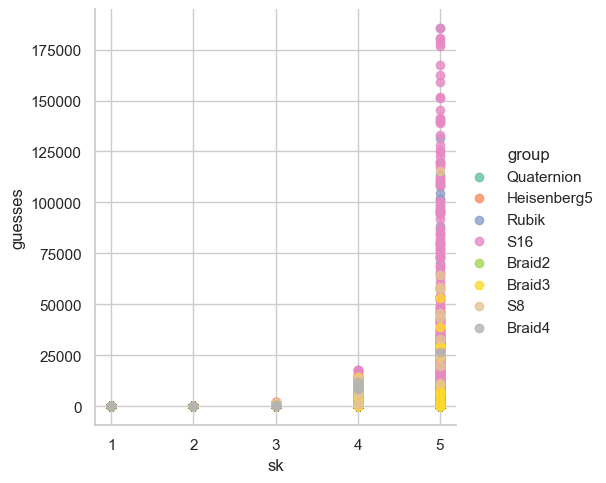

In [37]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df[(df.sk<=5)], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False)

Text(0.5, 1.0, 'Guess rate by group')

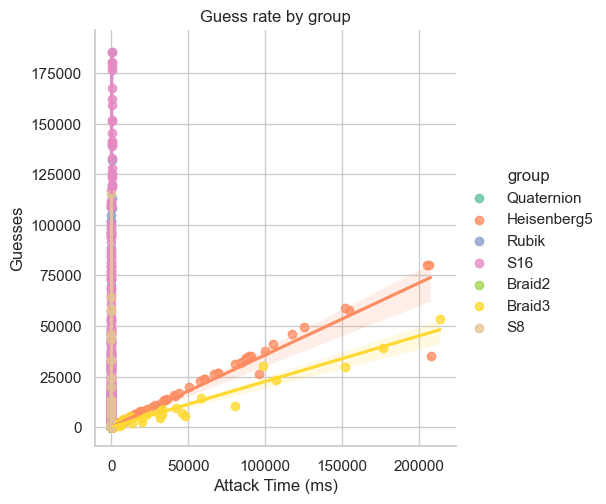

In [38]:
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df_no_braid[df_no_braid['sk']<=5], x='attack', y='guesses', hue='group', palette='Set2', fit_reg=True)
plt.ylabel("Guesses")
plt.xlabel("Attack Time (ms)")
plt.title("Guess rate by group")

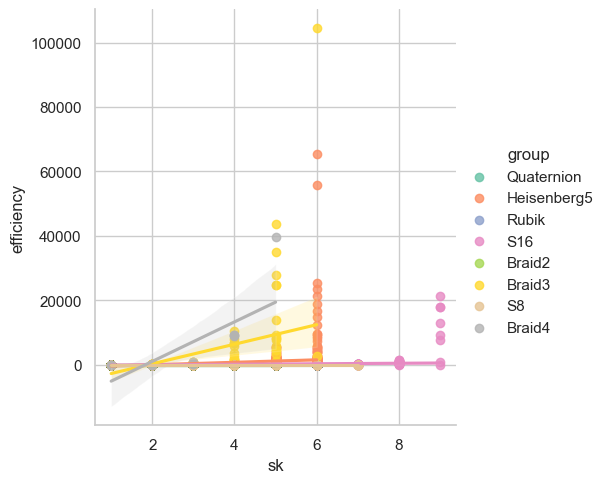

In [39]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='sk', y='efficiency', hue='group', palette='Set2')

TypeError: '<=' not supported between instances of 'str' and 'float'

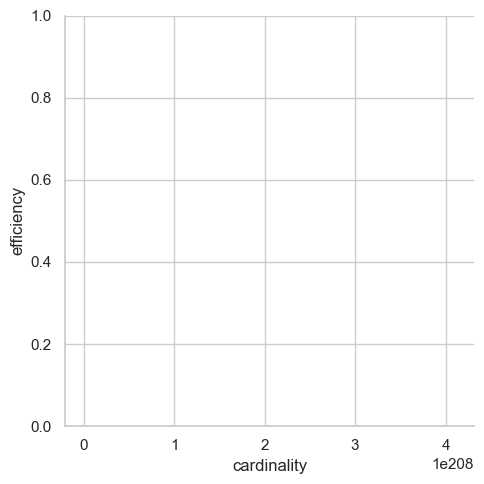

In [40]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='cardinality', y='efficiency', hue='sk', palette='Set2')

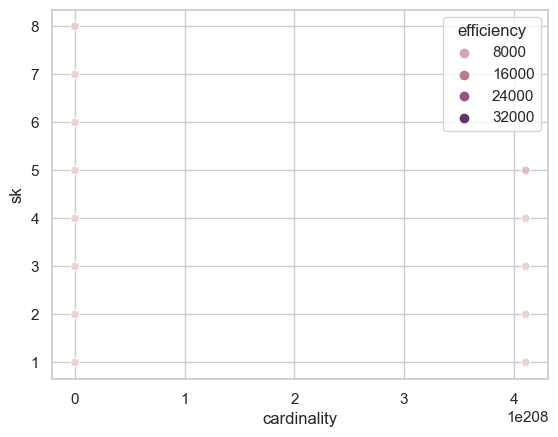

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
df['efficiency'] = df['attack'] / df['exchange']
gfg = sns.scatterplot(data=df, x='cardinality', y='sk', hue='efficiency')

S16: 2.126397271396224, 0.14466807276080562
Heisenberg5: 1.6736403704443148, 0.6225906093938657
Rubik: 2.0875160217148303, 0.21452888060583086
Braid3: 1.8726817336881345, 0.4299927511499796


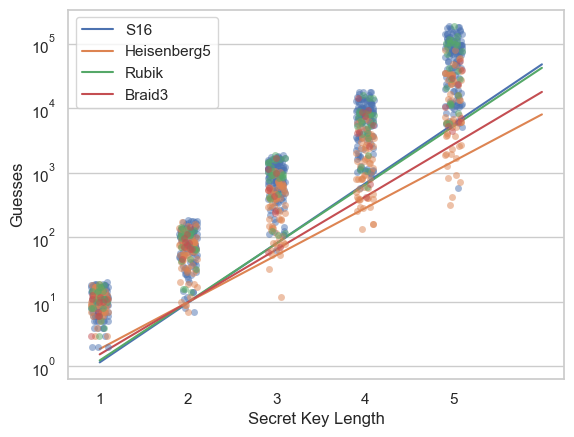

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Heisenberg5', 'Rubik', 'Braid3']:
    df_group = df[(df.pk==5)&(df.sk <=5)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='guesses', alpha=0.5)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)

    a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}')
    x = np.linspace(0, max(df_group['sk']), 100)
    y = np.exp(b) * np.exp(a * x)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
leg = plt.legend()
plt.yscale('log')
plt.xlabel("Secret Key Length")
plt.ylabel("Guesses")
plt.show()

S16: 2, 20
S16: 2.528416730096667, 2.2807634917206796, 18.469825114702193 -0.5252330213833475
Rubik: 3, 19
Rubik: 3.1525628587333703, 2.3017841669020886, 18.998698483377773 -0.6839162525855361
Heisenberg5: 3, 19
Heisenberg5: 3.8995478245080855, 1.8952623480654243, 3.0000861719764673 -0.535979793195689
Braid3: 3, 19
Braid3: 15.42018127342296, 1.1365273964981368, 3.0000000187577793 1.2309994932705681


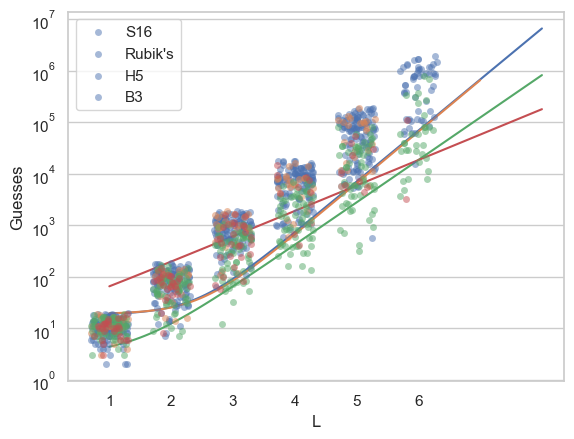

In [58]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Rubik', 'Heisenberg5', 'Braid3']:
    df_group = df[(df.pk==5)&(df.sk <= 6)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='guesses', alpha=0.5, jitter=0.3)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)
    max_guesses_sk_1 = max(df_group[df_group.sk==1]['guesses'])
    min_guesses_sk_1 = min(df_group[df_group.sk==1]['guesses'])
    print(f'{group}: {min_guesses_sk_1}, {max_guesses_sk_1}')

    def func(x, a, b, c, d):
        return (a * np.exp(b * (x+d))) + c
    popt, pcov = curve_fit(func, df_group['sk'], df_group['guesses'], p0=(0, 1, (min_guesses_sk_1+max_guesses_sk_1)/2, -1), bounds=([-np.inf, -np.inf, min_guesses_sk_1, -np.inf], [np.inf, np.inf, max_guesses_sk_1, 2]))
    a, b, c, d = popt
    #a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}, {c} {d}')
    x = np.linspace(0, max(df_group['sk'])+1, 100)
    y = func(x, *popt)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
# leg = plt.legend()
plt.legend(labels=['S16', 'Rubik\'s', 'H5', 'B3'])
plt.yscale('log')
plt.xlabel("L")
plt.ylabel("Guesses")
plt.savefig('../Guesses-L.pdf', bbox_inches='tight')
plt.show()

S16: 1.117813783459203, 2.204146839415145, 1.1268383622824454
Braid3: 17.674078761749392, 1.4063488687100325, 2.0589132743064129e-10
Heisenberg5: 0.3198173074385007, 2.1940123129795617, 61.3119398704155
Quaternion: 4.649377273986505, 0.036055889294436726, 3.0793756592300275e-12


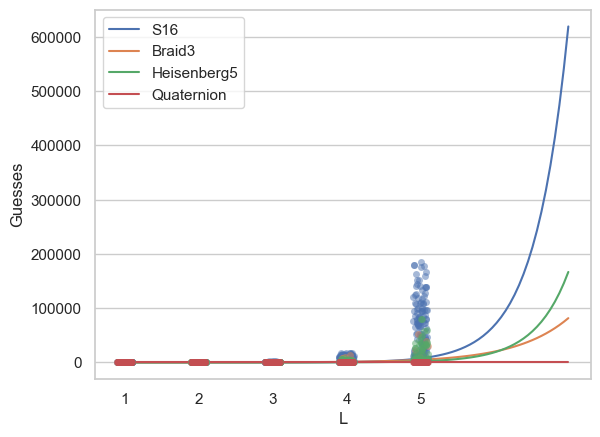

In [57]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Braid3', 'Heisenberg5','Quaternion']:
    df_group = df[(df.pk==5)&(df.sk<=5)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='guesses', alpha=0.5)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)
    def func(x, a, b, c):
        return a * np.exp(b * x) + c

    popt, pcov = curve_fit(func, df_group['sk'], df_group['guesses'], p0=(1, 1, 1), bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
    a, b, c = popt
    #a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}, {c}')
    x = np.linspace(0, max(df_group['sk'])+1, 100)
    y = func(x, *popt)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
leg = plt.legend()
#plt.yscale('log')

plt.xlabel("L")
plt.ylabel("Guesses")
plt.show()

S16: 0.00794048375305845, 2.2761438170786015, 0.023397279008184526 -1.003105583851879
Heisenberg5: 17.214125858972572, 1.9929472984640062, 164.62401187738593 -1.0001735653509847
Rubik: 0.004977577661309862, 2.4112258317123327, 0.02699680042011146 -1.0014338929736852
Braid3: 11.215895266139542, 1.7982638057863207, 4.9910004062395945 0.051556209261998776


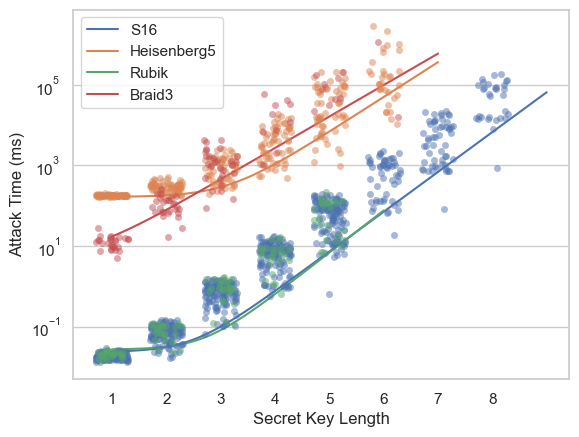

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Heisenberg5', 'Rubik', 'Braid3']:
    df_group = df[(df.pk==5)&(df.sk <=8)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='attack', alpha=0.5, jitter=0.3)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)

    max_attack_time_sk_1 = max(df_group[df_group.sk==1]['attack'])
    min_attack_time_sk_1 = min(df_group[df_group.sk==1]['attack'])

    def func(x, a, b, c, d):
        return (a * np.exp(b * (x+d))) + c
    popt, pcov = curve_fit(func, df_group['sk'], df_group['attack'], p0=(0, 2, (max_attack_time_sk_1+min_attack_time_sk_1)/2, -1), bounds=([-np.inf, -np.inf, min_attack_time_sk_1, -np.inf], [np.inf, np.inf, max_attack_time_sk_1, 2]))
    a, b, c, d = popt
    #a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}, {c} {d}')
    x = np.linspace(0, max(df_group['sk']), 100)
    y = func(x, *popt)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
leg = plt.legend()
plt.yscale('log')
plt.xlabel("Secret Key Length")
plt.ylabel("Attack Time (ms)")
plt.show()

/var/folders/xy/7x33379123vd25mldyhv3q7m0000gn/T/ipykernel_87082/1605875212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['guesses'] = np.log(df_group['guesses'])


Text(52.490624999999994, 0.5, 'Guesses (log scale)')

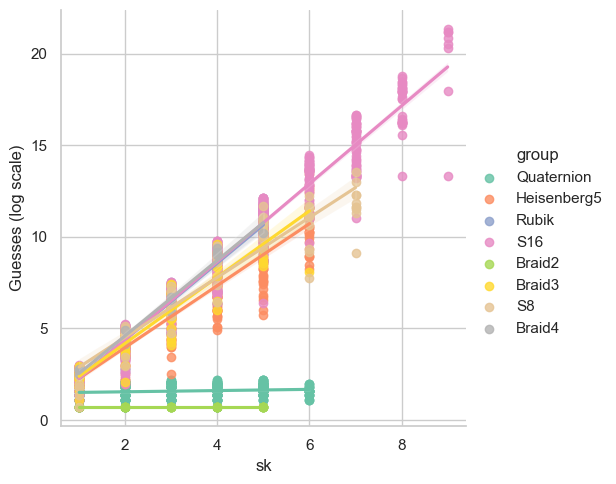

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")

df_group = df[(df.pk==5)]
df_group['guesses'] = np.log(df_group['guesses'])

gfg = sns.lmplot(data=df_group, x='sk', y='guesses', hue='group', palette='Set2', fit_reg=True, legend=True)
plt.ylabel("Guesses (log scale)")

# generate dataframe
#df2 = pd.DataFrame({'x': x, 'y': y})
#sns.lmplot(df_group, x='sk', y='guesses', hue='group', palette='Set2', fit_reg=True, legend=True)